#Chi Square Test

In [106]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [107]:
churn_data=pd.read_csv('Downloads/churn-modelling/Churn_Modelling.csv')

In [108]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [109]:
churn_data.drop(columns=['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [110]:
#H0: there is no relationship b/w Gender and Exited category columns 
#Ha: there is relationship b/w Gender and Exited category column

In [111]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [112]:
print("Rows     :",churn_data.shape[0])
print("Columns   :",churn_data.shape[1])
print("\n Features:\n ",churn_data.columns.tolist())
print("Unique value:\n",churn_data.nunique())

Rows     : 10000
Columns   : 11

 Features:
  ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Unique value:
 CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64


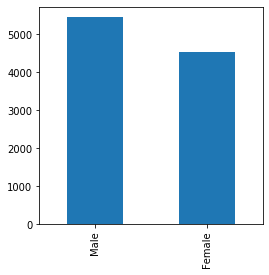

In [113]:
churn_data['Gender'].value_counts().plot(kind="bar",figsize=(4,4))

In [114]:
churn_data.groupby('Gender')['Exited'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,4543.0,0.250715,0.433473,0.0,0.0,0.0,1.0,1.0
Male,5457.0,0.164559,0.370816,0.0,0.0,0.0,0.0,1.0


In [115]:
gender_churn_cnt=pd.crosstab(index=churn_data['Gender'],columns=churn_data['Exited'])

In [116]:
gender_churn_cnt

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


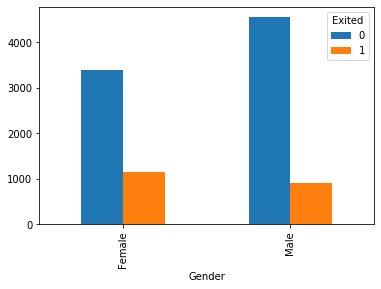

In [117]:
gender_churn_cnt.plot(kind="bar")

In [118]:
(chi2,pvalue,dof,_)=stats.chi2_contingency([gender_churn_cnt.iloc[0].values,gender_churn_cnt.iloc[1].values])

In [119]:
print("X^2 =",chi2)
print("p-value",pvalue)
print("degree of freedom=",dof)

X^2 = 112.91857062096116
p-value 2.2482100097131755e-26
degree of freedom= 1


In [120]:
#CRAMER V-Test for finding the relationship strength b/w two categories for which formula is
# V=SQRT(Chi^2/(Num of Rows*MinFromCrossTab(Columns,Rows)-1))

In [121]:
#alternate hypothesis is true,i.e there is significant difference on churn rate of gender as the p value is 0.00 something

In [122]:
V=np.sqrt(chi2/churn_data.shape[0])
V

0.10626315006669113

In [123]:
#H0: there is no relationship b/w HasCreditCard and Exited category columns 
#Ha: there is relationship b/w HasCreditCard and Exited category column

In [124]:
CreditCard_churn_cnt=pd.crosstab(index=churn_data['HasCrCard'],columns=churn_data['Exited'])

In [125]:
CreditCard_churn_cnt

Exited,0,1
HasCrCard,,
0,2332,613
1,5631,1424


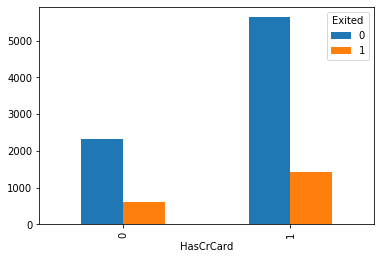

In [126]:
CreditCard_churn_cnt.plot(kind="bar")

In [127]:
(chi2,pvalue,dof,_)=stats.chi2_contingency([CreditCard_churn_cnt.iloc[0].values,CreditCard_churn_cnt.iloc[1].values])

In [128]:
print("X^2 =",chi2)
print("p-value",pvalue)
print("degree of freedom=",dof)

X^2 = 0.47133779904440803
p-value 0.49237236141554686
degree of freedom= 1


In [129]:
#has card have not significant difference on exited of customer therefore support the null hypothesis therefore drop the column 
# for feature selection

In [130]:
V=np.sqrt(chi2/churn_data.shape[0])
V

0.006865404569611379

# Therfore Relationship Strength

-HasCreditCard has 6% with Exited column
-Gender has 10.6% with Exited Column

In [131]:
churn_data.corr()#pearson correlation is correlation strength with only numeric column but above CRAMER V-Test is strength 
                # b/w category columns

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000
